In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

#matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # '맑은 고딕'으로 설정 
#matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
depart = pd.read_csv('E:\\Asiae\\data\\X_train.csv', encoding='cp949')


In [86]:
depart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036653 entries, 0 to 1036652
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   custid      1036653 non-null  int64  
 1   sales_date  1036653 non-null  object 
 2   sales_time  1036653 non-null  int64  
 3   str_nm      1036653 non-null  object 
 4   goodcd      1036653 non-null  float64
 5   brd_nm      1036653 non-null  object 
 6   corner_nm   1036653 non-null  object 
 7   pc_nm       1036653 non-null  object 
 8   part_nm     1036653 non-null  object 
 9   team_nm     1036653 non-null  object 
 10  buyer_nm    1036653 non-null  object 
 11  import_flg  1036653 non-null  int64  
 12  tot_amt     1036653 non-null  int64  
 13  dis_amt     1036653 non-null  int64  
 14  net_amt     1036653 non-null  int64  
 15  inst_mon    1036653 non-null  int64  
 16  inst_fee    1036653 non-null  int64  
dtypes: float64(1), int64(8), object(8)
memory usage: 134.5+ MB


In [3]:
np.random.seed(42)

In [4]:
#dc_rate 할인율 만들기
dc_rate = round((depart['dis_amt']/depart['tot_amt'])*100)
depart['dc_rate'] = dc_rate


# datetime 사용 시간변수 생성

In [5]:
import datetime

In [6]:
d = []
for i in range(len(depart)):
    d.append(datetime.datetime.strptime(depart['sales_date'][i], '%Y-%m-%d %H:%S' ))


# 월(sales_date_mon)

In [7]:
mon = []
for i in range(len(depart)):
    mon.append(d[i].month)
depart['sales_date_mon'] = mon

# 일(sales_date_day)

In [8]:
day = []
for i in range(len(depart)):
    day.append(d[i].day)
depart['sales_date_day'] = day

# 요일(sales_date_wday) 0~6 = 월화수목금토일

In [9]:
wday = []
for i in range(len(depart)):
    wday.append(d[i].weekday())
depart['sales_date_wday'] = wday

# 할부요인 변수 생성

In [ ]:
 #inst_tot / 무이자 할부 = 1/ 유이자 할부 = 2/ 일시불  = 3

In [10]:
inst_tot = [3 if(i==1) else 1 if(i > 1 and j==0) else 2 for i,j in zip(depart['inst_mon'], depart['inst_fee'])]
depart['inst_tot'] = inst_tot

In [11]:
depart.tail()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,...,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,dc_rate,sales_date_mon,sales_date_day,sales_date_wday,inst_tot
1036648,29998,2001-01-21 0:00,1320,무역점,4.241080e+12,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,의류패션팀,...,120000,0,120000,3,0,0.0,1,21,6,1
1036649,29998,2001-04-07 0:00,1633,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,...,38000,1900,36100,1,0,5.0,4,7,5,3
1036650,29999,2001-03-21 0:00,1803,천호점,4.109290e+12,루이까또즈,핸드백,핸드백,잡화,잡화가용팀,...,46000,2300,43700,1,0,5.0,3,21,2,3
1036651,29999,2001-03-29 0:00,1823,천호점,4.139350e+12,소피에르핀,넥타이,셔츠,남성의류,의류패션팀,...,49000,2450,46550,1,0,5.0,3,29,3,3
1036652,29999,2001-04-21 0:00,1313,천호점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화,잡화가용팀,...,52000,2600,49400,1,0,5.0,4,21,5,3


In [14]:
depart['dc_rate'].value_counts()

0.0     549242
5.0     401904
10.0     74728
3.0       3873
2.0       2240
4.0       2183
1.0       1879
8.0        176
7.0        156
6.0        143
9.0        121
20.0         5
65.0         2
40.0         1
Name: dc_rate, dtype: int64

# 시간대(sales_time_half)

In [ ]:
inst_tot = [3 if(i==1) else 1 if(i > 1 and j==0) else 2 for i,j in zip(depart['inst_mon'], depart['inst_fee'])]
depart['inst_tot'] = inst_tot

In [15]:
sales_time_half = [((i//100)*10)+((i%100)//30) for i in depart['sales_time']]

In [16]:
depart['sales_time_half'] = sales_time_half

In [17]:
depart['sales_time_half'].value_counts()

160    68532
161    68526
170    68030
151    67993
181    66508
150    65713
171    65392
180    65115
190    62373
141    61314
140    56675
131    53243
130    51099
121    48937
120    44757
111    40332
110    32351
191    25150
101    16264
200     6551
100      809
201      469
91       275
90        95
210       82
211       53
220        6
10         3
1          2
231        2
81         1
0          1
Name: sales_time_half, dtype: int64

# Refund 내역 제거

In [57]:
# net_amt에 -가 있는 값만 추출
is_return = depart['net_amt'] <0
df_refund = depart[is_return]
len(df_refund)

69199

In [58]:
# net_amt에 0 이상인 값만 추출
is_return = depart['net_amt'] >= 0
df = depart[is_return]
len(df)

967454

In [59]:
df_tmp = depart

In [60]:

df_tmp['tot_amt'] = -df_tmp['tot_amt']
df_tmp = df_tmp.drop_duplicates(['custid', 'str_nm', 'goodcd', 'brd_nm', 'corner_nm', 'buyer_nm', 'tot_amt'], keep=False)
len(df_tmp)

977923

In [61]:
is_return = df_tmp['net_amt'] <0
df_tmp2 = df_tmp[~is_return]
df_tmp2

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,...,dis_amt,net_amt,inst_mon,inst_fee,dc_rate,sales_date_mon,sales_date_day,sales_date_wday,inst_tot,color
0,0,2000-06-25 0:00,1212,무역점,2.116050e+12,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,...,9000,81000,3,0,10.0,6,25,6,1,r
1,0,2000-06-25 0:00,1242,무역점,4.125440e+12,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,...,3900,35100,1,0,10.0,6,25,6,3,b
2,0,2000-08-26 0:00,1810,본점,2.116050e+12,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,...,17500,157500,3,0,10.0,8,26,5,1,r
3,0,2000-08-26 0:00,1830,본점,4.106430e+12,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,...,45500,409500,3,0,10.0,8,26,5,1,r
4,0,2000-09-03 0:00,1802,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,...,10000,90000,3,0,10.0,9,3,6,1,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036648,29998,2001-01-21 0:00,1320,무역점,4.241080e+12,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,의류패션팀,...,0,120000,3,0,0.0,1,21,6,1,r
1036649,29998,2001-04-07 0:00,1633,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,...,1900,36100,1,0,5.0,4,7,5,3,b
1036650,29999,2001-03-21 0:00,1803,천호점,4.109290e+12,루이까또즈,핸드백,핸드백,잡화,잡화가용팀,...,2300,43700,1,0,5.0,3,21,2,3,b
1036651,29999,2001-03-29 0:00,1823,천호점,4.139350e+12,소피에르핀,넥타이,셔츠,남성의류,의류패션팀,...,2450,46550,1,0,5.0,3,29,3,3,b


In [62]:
df_tmp2['tot_amt'] = -df_tmp2['tot_amt']

<ipython-input-62-8f6ab0f52d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp2['tot_amt'] = -df_tmp2['tot_amt']


In [63]:
df_tmp2['tot_amt']

0           90000
1           39000
2          175000
3          455000
4          100000
            ...  
1036648    120000
1036649     38000
1036650     46000
1036651     49000
1036652     52000
Name: tot_amt, Length: 911332, dtype: int64

---
---
---

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(depart, test_size=0.2, random_state=42)

In [28]:
train_set.head()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,dc_rate
904814,26076,2000-10-15 0:00,1730,신촌점,4.417750e+12,베이비헤로스,미확인코너,아동,아동문화,잡화가용팀,유아동복,0,79200,0,79200,3,0,0.0
812664,23456,2000-08-19 0:00,1730,신촌점,4.507920e+12,팩.게임CD,완구,문화,아동문화,잡화가용팀,문화완구,0,59000,0,59000,3,0,0.0
59385,1721,2001-01-21 0:00,1930,본점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,54000,2700,51300,1,0,5.0
536933,15384,2000-11-19 0:00,1723,신촌점,2.139140e+12,랑콤,색조화장품,화장품,패션잡화,잡화가용팀,화장품,0,76000,3800,72200,1,0,5.0
11582,335,2000-06-14 0:00,1253,천호점,4.120440e+12,베네통토탈,토탈,핸드백,잡화,잡화가용팀,피혁B,0,5300,270,5030,1,0,5.0


<AxesSubplot:>

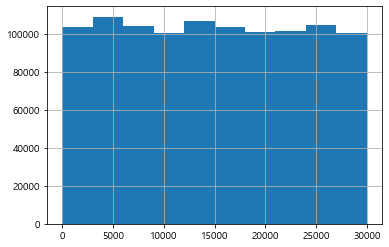

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE1D7779A0>,
      dtype=object)

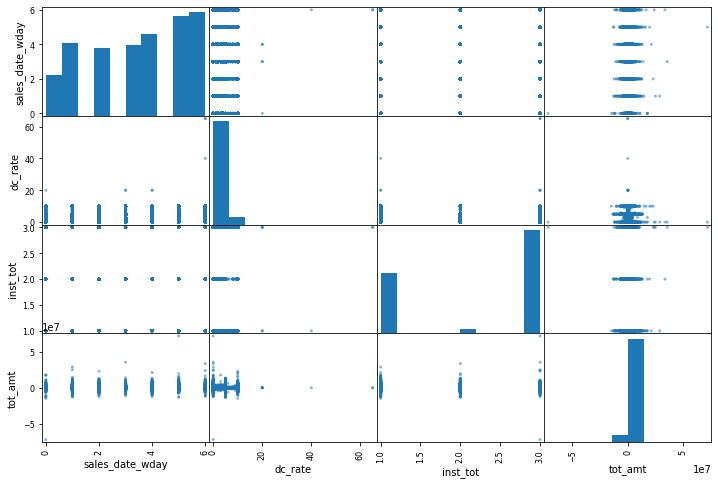

In [14]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["sales_date_wday", "dc_rate", "inst_tot",
              "tot_amt"]
scatter_matrix(depart[attributes], figsize=(12, 8))

In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(depart[['str_nm']])
housing_cat_1hot


<1036653x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1036653 stored elements in Compressed Sparse Row format>

In [17]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [19]:
cat_encoder.categories_

[array(['무역점', '본점', '신촌점', '천호점'], dtype=object)]

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(depart[['str_nm']])
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [28]:
# iris 데이터의 꽃받침 길이와 너비에 대해 로지스틱 회귀 수행

# iris 데이터 호출 : iris 데이터는 Setosa, Versicolor, Virginica와 같이 3개의 클래스로 구성됨. 각각의 값은 0, 1, 2임
import sklearn.datasets as d
iris = d.load_iris()

# 독립변수(feature_names)와 종속변수(target_names) 확인
#print("특성 :", iris.feature_names)
#print("클래스 :", iris.target_names)
# 특성 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 클래스 : ['setosa' 'versicolor' 'virginica']



import matplotlib.pyplot as plt

# 세 클래스를 구분할 색깔 리스트 생성
c_set = ["blue", "red", "green"]
# 세 클래스를 구분할 모양 리스트 생성
m_set = ["o", "x", "^"]
# 세 클래스를 구분하기 위해 각각의 종속변수 이름 리스트 저장
l_set = iris.target_names

# 독립변수, 종속변수 생성
X = iris.data
y = iris.target

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
import matplotlib.pyplot as plt


0          1212
1          1242
2          1810
3          1830
4          1802
           ... 
1036648    1320
1036649    1633
1036650    1803
1036651    1823
1036652    1313
Name: sales_time, Length: 1036653, dtype: int64

In [66]:
import math

In [69]:
df_tmp2['tot_amt_log']= df_tmp2['tot_amt'].pct_change()

<ipython-input-69-3dde81fd3cd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp2['tot_amt_log']= df_tmp2['tot_amt'].pct_change()


In [70]:
df_tmp2['tot_amt_log']

0               NaN
1         -0.566667
2          3.487179
3          1.600000
4         -0.780220
             ...   
1036648    2.243243
1036649   -0.683333
1036650    0.210526
1036651    0.065217
1036652    0.061224
Name: tot_amt_log, Length: 911332, dtype: float64

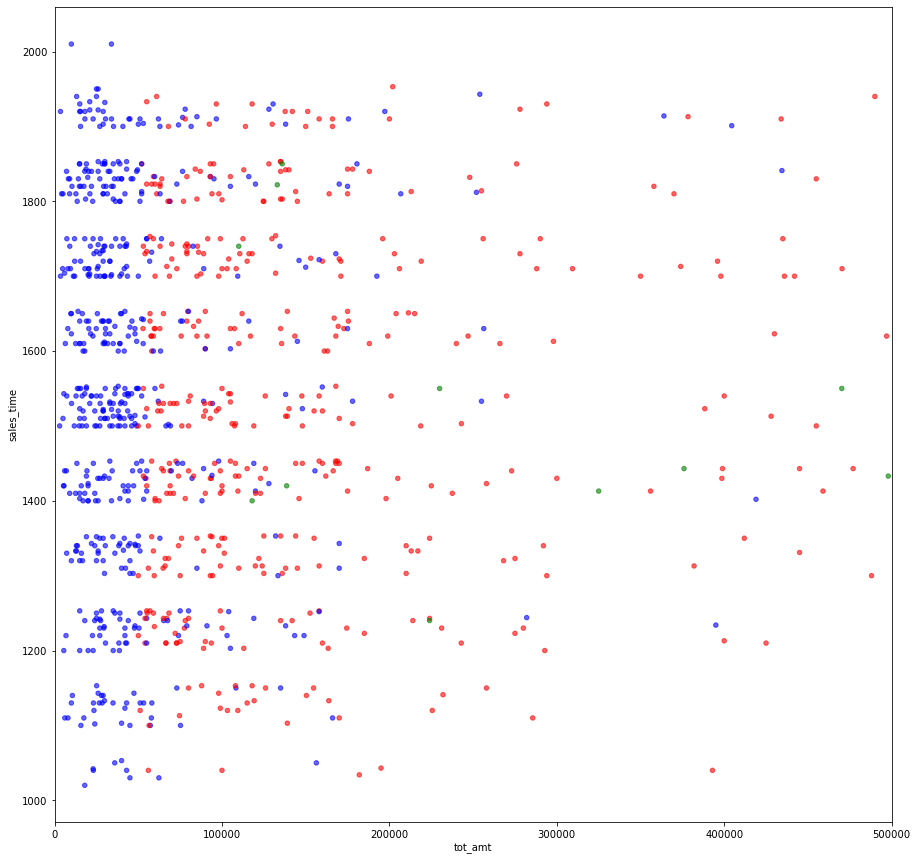

In [81]:
df_tmp2.head(1000).plot.scatter(x="tot_amt", y="sales_time", c=df_tmp2["color"].head(1000), figsize=(15,15), alpha=0.6, xlim=[0,500000])

In [44]:
 #inst_tot / 무이자 할부 = r   / 유이자 할부 = g   / 일시불  = b
zero = depart[depart['inst_tot'] == 1].index
five = depart[depart['inst_tot'] == 2].index
ten = depart[depart['inst_tot'] == 3].index

depart.loc[zero, "color"] = "r"
depart.loc[five, "color"] = "g"
depart.loc[ten, "color"] = "b"




In [43]:
(depart[inst_tot])

NameError: name 'unique' is not defined